In [61]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz

# TRAINING DATASET

In [62]:
train_images_df = pd.read_csv('train_images.csv')
x_train = train_images_df.values
train_images_df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.350
0,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,22,...,0,0,0,0,133,167,73,0,0,0


In [63]:
train_labels_df = pd.read_csv('train_labels.csv')
y_train = train_labels_df.values.ravel()
train_labels_df.head()


,9
0,0
1,0
2,3
3,0
4,2


In [64]:
test_images_df = pd.read_csv('test_images.csv')
x_test = test_images_df.values
test_images_df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516
0,0,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,164,58,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,21,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,1,1,0,0,0,...,71,12,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,145,129,62,0,0,0,0,0,0,0


In [65]:
test_labels_df = pd.read_csv('test_labels.csv')
y_test = test_labels_df.values.ravel()
test_labels_df.head()

,9
0,2
1,1
2,1
3,6
4,1


In [66]:
# Printing out the unique classes in our label files. Should match with below
print("Class distribution in training set: ", np.unique(y_train))
# Class distribution in training set:  [0 1 2 3 4 5 6 7 8 9]
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Class distribution in training set:  [0 1 2 3 4 5 6 7 8 9]


# Binarization – Select a threshold, ‘del’, to be 127: 

All pixel values less than ‘del’ are given value 0 
All pixel values greater than or equal to ‘del’ are given value 1 


In [88]:
# Threshold, 'del', to be 127
def binarize_images(images, threshold=127):
    # convert grayscale images 0-255 into binary, either 1 or 0
    return (images >= threshold).astype(int)

In [89]:
# Default binarization with threshold 127
x_train_bin = binarize_images(x_train)
print(f'Training Data Binarized: {x_train_bin}')
# print(f'First entry in binarized training data: {x_train_bin[1]}')
x_test_bin = binarize_images(x_test)
print(f'Testing Data Binarized: {x_test_bin}')

Training Data Binarized: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Testing Data Binarized: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [69]:
trouser_class = 1
pullover_class = 2

# Filter to only have trousers and pullovers
filtering_indices_train = np.where((y_train == trouser_class) | (y_train == pullover_class))
filtering_indices_test = np.where((y_test == trouser_class) | (y_test == pullover_class))

In [83]:
# Applying filter to images and labels data
x_train_filtered = x_train_bin[filtering_indices_train]
print(f'Images Filtered: {x_train_filtered}')
y_train_filtered = y_train[filtering_indices_train]
print(f'Labels Filtered: {y_train_filtered}')

x_test_filtered = x_test_bin[filtering_indices_test]
y_test_filtered = y_test[filtering_indices_test]

Images Filtered: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Labels Filtered: [2 2 1 ... 1 2 1]


In [84]:
# Printing to see what our data looks like now
print(f'Number of training samples (Trousers and Pullovers only): {len(x_train_filtered)}')
print(f'Number of testing samples (Trousers and Pullovers only): {len(x_test_filtered)}')
print(f'Classes in filtered training set: {np.unique(y_train_filtered)}')
print(f'Line above means that only Trousers(1) and Pullovers(2) are in the dataset')

Number of training samples (Trousers and Pullovers only): 12000
Number of testing samples (Trousers and Pullovers only): 2000
Classes in filtered training set: [1 2]
Line above means that only Trousers(1) and Pullovers(2) are in the dataset


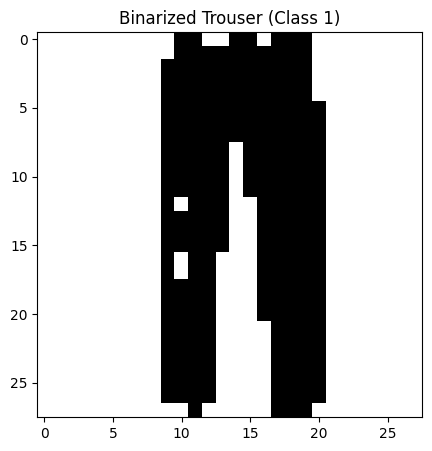

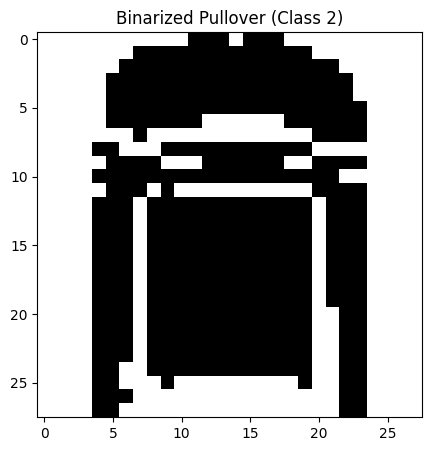

In [85]:
# Let's visualize one example of each class after filtering and binarization
trouser_idx = np.where(y_train_filtered == trouser_class)[0][0]
pullover_idx = np.where(y_train_filtered == pullover_class)[0][0]

def display_image(pixels, title):
    # Reshape the 784 pixels to 28x28 image
    img = pixels.reshape(28, 28)
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='binary')
    plt.title(title)
    plt.show()

display_image(x_train_filtered[trouser_idx], f'Binarized Trouser (Class {trouser_class})')
display_image(x_train_filtered[pullover_idx], f'Binarized Pullover (Class {pullover_class})')

# NAIVE BAYES CLASSIFICATION 



In [73]:
# Bayes' Theorem
# P(A|B) = P(B | A) * P(A) / P(B)
# P(A|B) = Probability the item is a trouser, given the pixel data
# P(A) = probability of picking a trouser without looking
# P(B) = probability of seeing that pixel pattern in any image

# Our dataset --> 50% of images are Trousers and 50% are Pullovers
# P(Trouser) = 0.5, P(Pullover) = 0.5 ----> so P(A) is 0.5

# Need to look at how often each pixel is black or white in our training data
# will have to calculate probability of 1st pixel being black indicating a trouser
# then calculate all the other pixels being black == trouser?

In [90]:
# Prior Probabilities
n_samples = len(x_train_filtered)
classes = np.unique(y_train_filtered)
n_classes = len(classes)
print(f'{n_samples} training samples, {n_classes} classes')

12000 training samples, 2 classes


In [91]:
# Initialize arrays to store our probabilities
class_priors = np.zeros(n_classes)
print(f'Class priors initialized: {class_priors}')
pixel_probs = np.zeros((n_classes, x_train_filtered.shape[1], 2))
print(f'Pixel probabilities initialized: {pixel_probs}')

Class priors initialized: [0. 0.]
Pixel probabilities initialized: [[[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]]


In [92]:
for i, c in enumerate(classes):
    # every sample of this class
    x_c = x_train_filtered[y_train_filtered == c]
    print(f'Instance of class in training data: {x_c}')

    # prior probability = count of class / total samples in data
    class_priors[i] = len(x_c) / n_samples
    print(f'Calculating class prior for {c}, current length of x_c: {len(x_c)}, current n_samples: {n_samples}')
    print(f'Class prior {c} = {class_priors[i]}')

    # calc prob of each pixel being 1 for this class
    # add 1 for Laplace smoothing (avoid zero probabilities)
    n_samples_c = len(x_c)
    print(f'N samples c: {n_samples_c}')

    # count how many times each pixel is 1 in this class
    pixel_one_counts = np.sum(x_c, axis=0) + 1 # +1 is Laplace smoothing
    print(f'Pixel one counts: {pixel_one_counts}')

    # probability of pixel being 1 given the class (with laplace smoothing)
    pixel_probs[i, :, 1] = pixel_one_counts / (n_samples_c + 2)
    # print(f'Pixel probability of being 1: {pixel_probs[i, :, 1]}')

    # probability of pixel being 0 given the class (with laplace smoothing)
    pixel_probs[i, :, 0] = 1 - pixel_probs[i, :, 1]
    # print(f'Pixel probability of being 0: {pixel_probs[i, :, 0]}')

Instance of class in training data: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Calculating class prior for 1, current length of x_c: 6000, current n_samples: 12000
Class prior 1 = 0.5
N samples c: 6000
Pixel one counts: [   1    1    1    1    3    6   22   65  162  619 2657 3381 2927 2787
 2454 2745 2727 2827 2166  467   99   40    9    1    1    1    1    1
    1    1    1    2    3   17   56  120  359 1512 4884 5588 5587 5568
 5540 5408 5419 5160 4096 1040  232   93   28    5    1    1    1    1
    1    1    1    2    7   22   63  141  410 1978 5125 5376 5306 5357
 5431 5191 5209 5106 4272 1214  262   99   42    7    1    1    1    1
    1    1    1    3    9   35   77  162  517 2687 5338 5340 5315 5419
 5422 5195 5177 5118 4635 1852  366  117   55   13    2    1    1    1
    1    1    2    5   12   47   98  194  672 3335 5294 5198 5317 5426
 5499 5281 5179 5006 4679 2400  431  131   64   18    5    1    

In [76]:
import math
def predict_naive_bayes(x, class_priors, pixel_likelihoods):
    predictions = []
    log_probs = []
    
    # we will loop over each image
    for image in x:
        scores = {}
        
        #looping over each class
        for cLass in class_priors.keys():
            # start with log prior
            log_prob = math.log(class_priors[cLass])

            # Compute log likelihoods manually
            for pixel in range(len(image)):
                prob_1 = pixel_likelihoods[cLass]["1"][pixel]
                prob_0 = pixel_likelihoods[cLass]["0"][pixel]

                # Ensure we do not take log(0) by adding a small smoothing factor
                if prob_1 == 0:
                    prob_1 = 1e-10  # Small smoothing factor
                if prob_0 == 0:
                    prob_0 = 1e-10

                if image[pixel] == 1:
                    log_prob += math.log(prob_1)
                else:
                    log_prob += math.log(prob_0)
            
            scores[cLass] = log_prob #store total score for this class
        
        # Storing the log probabilities in an array
        log_probs.append([scores[1], scores[2]])
        
        # print(scores)
        predicted_class = max(scores, key=scores.get)
        predictions.append(predicted_class)
    
    return log_probs, predictions


In [77]:
log_probs, y_predict = predict_naive_bayes(x_test_filtered, class_priors, pixel_likelihoods)
print(f'Log probabilities: {log_probs}')
print(f'Class Prediction from testing data: {y_predict}')

Log probabilities: [[-978.6138318037533, -282.38639353735596], [-113.42479216884084, -393.68451592950845], [-164.76969092920484, -427.02138100433757], [-226.8063696243887, -408.42226390917045], [-181.46433358868532, -408.3433358078738], [-589.9598299679637, -479.8402217141595], [-1479.0957815071743, -631.8979221112432], [-118.66104742603765, -419.7190793269338], [-138.17825482470982, -395.6695638250213], [-1035.9973077816016, -334.18748528299403], [-137.69727486730574, -387.72704794975414], [-432.0167658817738, -441.96481196911503], [-925.5454223088527, -286.2437279266704], [-530.2662713158732, -424.425287833667], [-1177.0538688594222, -418.55543284117806], [-115.04283127268248, -381.9781157679307], [-231.5174457031322, -462.3171502114412], [-385.54707815997864, -485.83752781599], [-1424.5280266802051, -554.1239641493559], [-656.9861333110674, -295.3994277706925], [-119.71008575699489, -390.401188276908], [-939.1434555547193, -291.2983887074376], [-342.3842041762227, -493.0241847929587

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(log_probs)
scaled_df = pd.DataFrame(scaled)
scaled_df.columns = ["Trousers", "Pullovers"]

print('Scaled Prediction Statistics')
print(scaled_df.head())

Scaled Prediction Statistics
   Trousers  Pullovers
0  0.490828   0.931238
1  0.990510   0.760736
2  0.960856   0.709666
3  0.925028   0.738159
4  0.951215   0.738280


# Plot ROC Curve

In [79]:
trouser_probs = scaled_df.iloc[:, 0]
print(trouser_probs)
pullover_probs = scaled_df.iloc[:, 1]

0       0.490828
1       0.990510
2       0.960856
3       0.925028
4       0.951215
          ...   
1995    0.943550
1996    0.827932
1997    0.990274
1998    0.890495
1999    0.970959
Name: Trousers, Length: 2000, dtype: float64


In [80]:
def perf_metrics(y_actual, y_predicted_probs,threshold):
    """
    
    :param y_actual: True labels for testing data (1 for trouser, 2 for pullover)
    :param y_predicted_probs: List of predicted probabilities (scaled between 0 and 1)
    :param thresholds: List of thresholds (0 to 1)
    :return: fpr_values: list of false positive rates
    :return: tpr_values: list of true positive rates
    """
    tp = 0 # correctly predict trouser
    fp = 0 # incorrectly predict trouser
    tn = 0 # correctly predict pullover
    fn = 0 # incorrectly predict pullover

    for i in range(len(y_predicted_probs)):
        if y_predicted_probs[i] >= threshold:
            if y_actual[i] == 1:  # Correctly classified Trouser
                tp += 1
            else:  # Incorrectly classified Pullover as Trouser
                fp += 1
        else:
            if y_actual[i] == 2:  # Correctly classified Pullover
                tn += 1
            else:  # Incorrectly classified Trouser as Pullover
                fn += 1
    
        # Compute TPR and FPR (avoid division by zero)
    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)
    
    return [fpr, tpr]

In [81]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95]
fpr_values = []
tpr_values = []

# loop through thresholds
for threshold in thresholds:
    fpr, tpr = perf_metrics(y_test, trouser_probs, threshold)
    fpr_values.append(fpr)
    tpr_values.append(tpr)

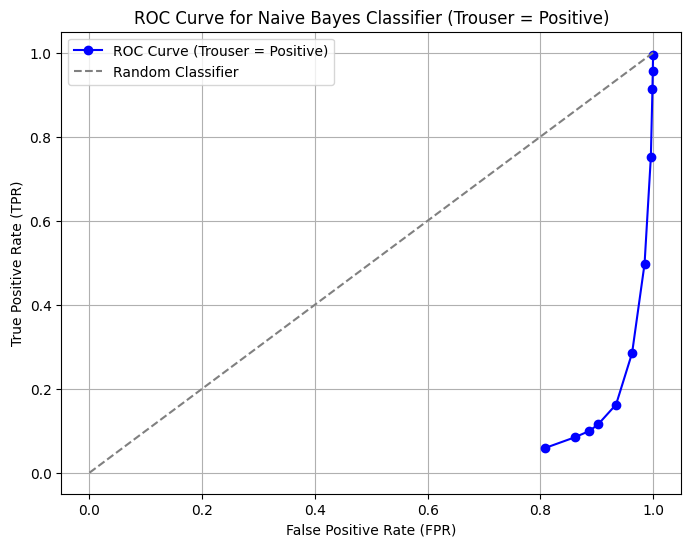

In [82]:
# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, marker='o', linestyle='-', color='b', label="ROC Curve (Trouser = Positive)")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Naive Bayes Classifier (Trouser = Positive)")
plt.legend()
plt.grid()
plt.show()

# Decision Tree
Use Decision tree technique to differentiate classify samples between trouser and pullover
You should use gini index for discriminatory features and maximum tree height should be 10


In [93]:
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10)

dt_classifier.fit(x_train_filtered, y_train_filtered)

DecisionTreeClassifier(max_depth=10)

In [98]:
#dt prediction
y_train_prediction_dt = dt_classifier.predict(x_train_filtered)
y_test_prediction_dt = dt_classifier.predict(x_test_filtered)
print(f'Decision Tree predictions on training data: {y_train_prediction_dt}')
print(f'Actual class values of training data: {y_train_filtered}')

print(f'Decision Tree predictions on testing data: {y_test_prediction_dt}')
print(f'Actual class values of testing data: {y_test_filtered}')

Decision Tree predictions on training data: [2 2 1 ... 1 2 1]
Actual class values of training data: [2 2 1 ... 1 2 1]
Decision Tree predictions on testing data: [2 1 1 ... 1 2 1]
Actual class values of testing data: [2 1 1 ... 1 1 1]


In [95]:
train_accuracy_dt = accuracy_score(y_train_filtered, y_train_prediction_dt)
test_accuracy_dt = accuracy_score(y_test_filtered, y_test_prediction_dt)
print(f'Decision Tree training accuracy: {train_accuracy_dt}')
print(f'Decision Tree testing accuracy: {test_accuracy_dt}')

Decision Tree training accuracy: 0.9916666666666667
Decision Tree testing accuracy: 0.9735


# Comparison between DT prediction and Naive Bayes Prediction

In [101]:
# Count how many incorrect predictions the DT made for the testing data
incorrect_predictions = []
for index, prediction in enumerate(y_test_prediction_dt):
    if prediction != y_test_filtered[index]:
        incorrect_predictions.append({
            "Image Index": index,
            "Prediction": prediction,
            "Correct Label": y_test_filtered[index]
        })
        
incorrect_predictions_df = pd.DataFrame(incorrect_predictions)
print(incorrect_predictions_df)
print(f'Number of incorrect predictions: {len(incorrect_predictions_df)}')

    Image Index  Prediction  Correct Label
0             6           1              2
1            61           1              2
2            92           1              2
3           155           1              2
4           265           1              2
5           323           1              2
6           398           2              1
7           427           1              2
8           438           1              2
9           492           2              1
10          504           2              1
11          557           2              1
12          558           2              1
13          585           1              2
14          631           2              1
15          637           1              2
16          685           2              1
17          712           1              2
18          770           2              1
19          779           1              2
20          892           2              1
21          913           2              1
22         